# Word2vec

In this work you will calculate word embeddings with neural model and compare its results with LSA.

Code from [Mateusz Bednarski](https://towardsdatascience.com/implementing-word2vec-in-pytorch-skip-gram-model-e6bae040d2fb) article is used.

In [2]:
%env LC_ALL=en_US.UTF-8
%env LANG=en_US.UTF-8

import nltk
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

env: LC_ALL=en_US.UTF-8
env: LANG=en_US.UTF-8


In [1]:
from nltk import word_tokenize
corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]
tokenized_corpus = list(map(word_tokenize, corpus))

In [4]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

In [5]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        # for each window position
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            # make soure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs)

In [6]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

In [7]:
embedding_dims = 2
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)
num_epochs = 1000
learning_rate = 0.001

for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.data[0]
        loss.backward()
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')

/Users/anatolii.stehnii/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Loss at epo 0: 3.5163509845733643
Loss at epo 10: 3.366441011428833
Loss at epo 20: 3.2494847774505615
Loss at epo 30: 3.155801773071289
Loss at epo 40: 3.0792462825775146
Loss at epo 50: 3.0156049728393555
Loss at epo 60: 2.9618518352508545
Loss at epo 70: 2.915764808654785
Loss at epo 80: 2.8756775856018066
Loss at epo 90: 2.8403329849243164
Loss at epo 100: 2.808767080307007
Loss at epo 110: 2.780237913131714
Loss at epo 120: 2.7541699409484863
Loss at epo 130: 2.730113983154297
Loss at epo 140: 2.7077176570892334
Loss at epo 150: 2.686706066131592
Loss at epo 160: 2.666868209838867
Loss at epo 170: 2.6480331420898438
Loss at epo 180: 2.6300718784332275
Loss at epo 190: 2.612882137298584
Loss at epo 200: 2.5963799953460693
Loss at epo 210: 2.5804965496063232
Loss at epo 220: 2.565176486968994
Loss at epo 230: 2.550365447998047
Loss at epo 240: 2.5360186100006104
Loss at epo 250: 2.522095203399658
Loss at epo 260: 2.5085573196411133
Loss at epo 270: 2.495373487472534
Loss at epo 280:

In [8]:
word_embeddings = (W1.transpose(0, 1)+W2).detach().numpy()/2

In [11]:
words = ['he', 'she', 'king', 'queen']
indexes = [word2idx[word] for word in words]

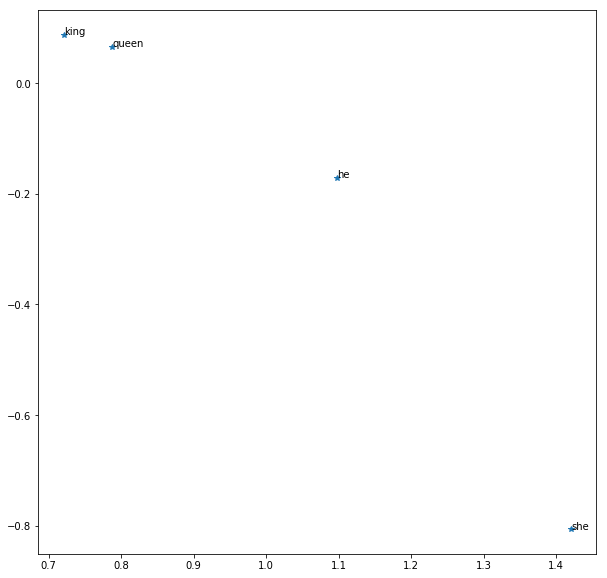

In [12]:
coordinates  = [word_embeddings[i,0:2] for i in indexes]
xdata, ydata = zip(*coordinates)
plt.plot(xdata, ydata, '*')
for c, word in zip(coordinates, words):
    plt.text(c[0], c[1], word)
plt.show()